In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('datasets/housing.csv')

In [34]:
categorical_columns = set(df.columns) - {'price', 'area'}

for col in categorical_columns:
    df[col] = df[col].astype('category')

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   price             545 non-null    int64   
 1   area              545 non-null    int64   
 2   bedrooms          545 non-null    category
 3   bathrooms         545 non-null    category
 4   stories           545 non-null    category
 5   mainroad          545 non-null    category
 6   guestroom         545 non-null    category
 7   basement          545 non-null    category
 8   hotwaterheating   545 non-null    category
 9   airconditioning   545 non-null    category
 10  parking           545 non-null    category
 11  prefarea          545 non-null    category
 12  furnishingstatus  545 non-null    category
dtypes: category(11), int64(2)
memory usage: 16.2 KB


In [35]:
df['price'] = df['price'] / 1000000

In [36]:
df['area'] = df['area'] / 1000

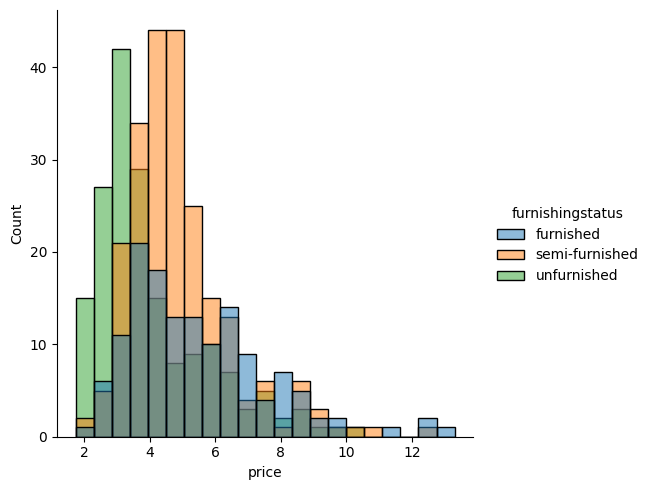

In [49]:
g = sns.displot(
    data=df,
    x='price',
    hue='furnishingstatus',
)

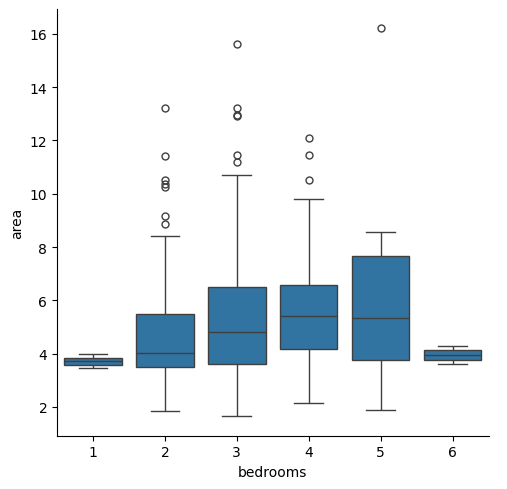

In [54]:
sns.catplot(
    data=df,
    kind='box',
    x='bedrooms',
    y='area'
)


In [58]:
df[~df['bedrooms'].isin([6, 1])]

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13.30000,7.42,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12.25000,8.96,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12.25000,9.96,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12.21500,7.50,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11.41000,7.42,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1.82000,3.00,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1.76715,2.40,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1.75000,3.62,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1.75000,2.91,3,1,1,no,no,no,no,no,0,no,furnished


<Axes: xlabel='area', ylabel='price'>

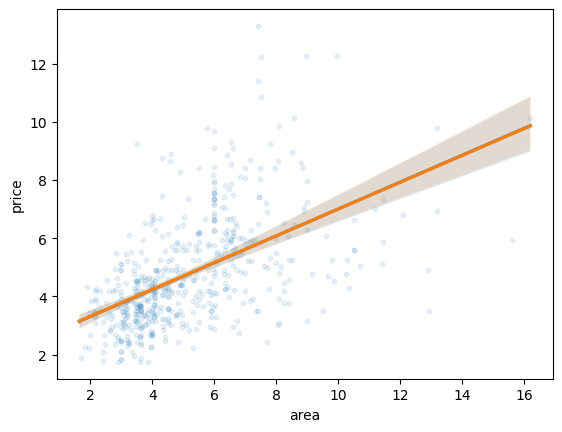

In [64]:
sns.regplot(
    data=df,
    x='area',
    y='price',
    scatter_kws={'alpha': 0.1, 's': 10},
)

sns.regplot(
    data=df[~df['bedrooms'].isin([6, 1])],
    x='area',
    y='price',
    scatter=False,
)

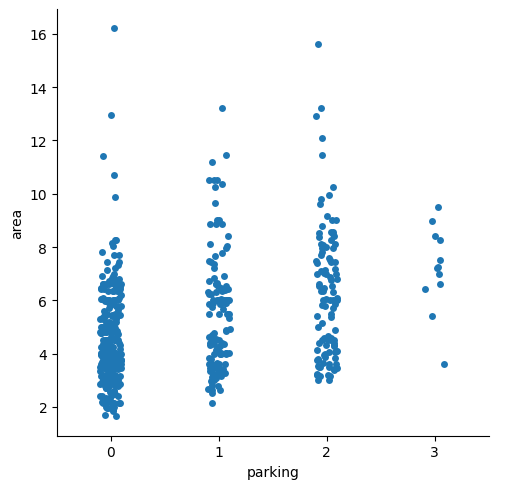

In [69]:
sns.catplot(
    data=df,
    x='parking',
    y='price',
    kind='strip',
)

<Axes: xlabel='area', ylabel='price'>

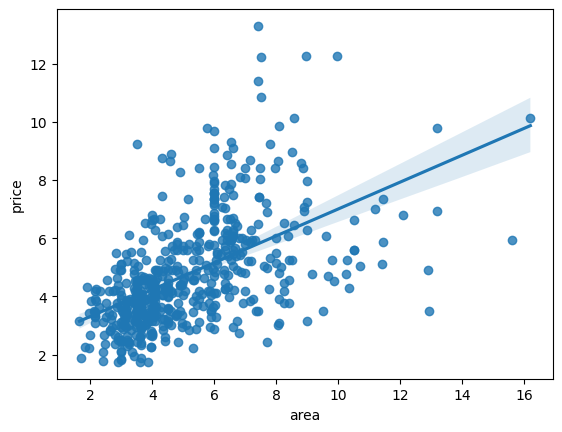

In [74]:
sns.regplot(
    data=df,
    x='area',
    y='price',
)

In [78]:
for col in categorical_columns:
    df[col] = df[col].cat.codes

<Axes: >

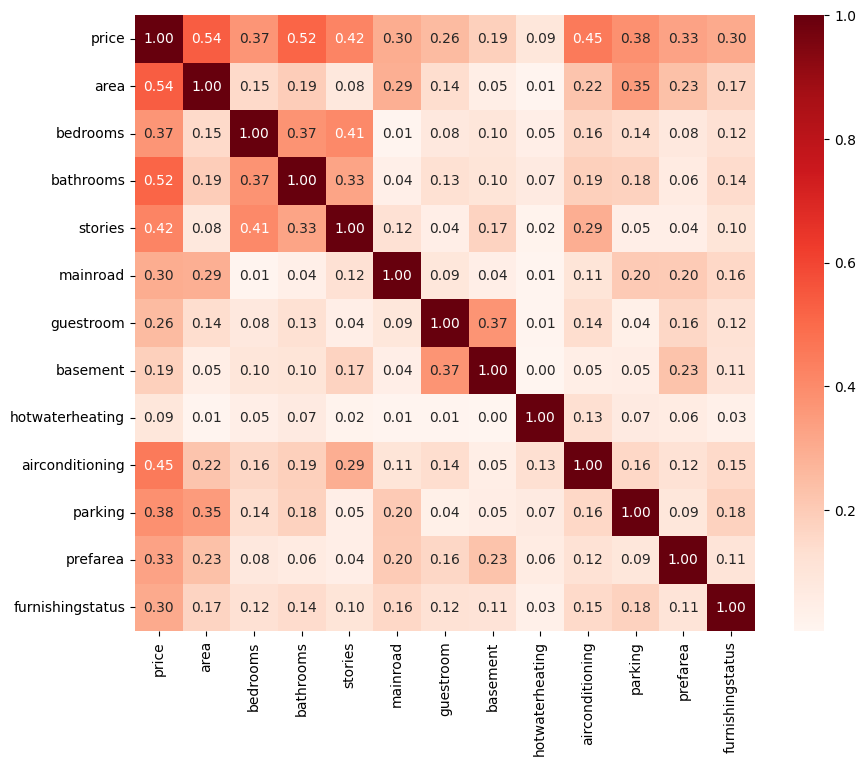

In [89]:
plt.figure(figsize=(10, 8))
sns.heatmap(
    abs(df.corr()),
    annot=True,
    fmt='.2f',
    cmap='Reds',
)


In [102]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# import random forests
from sklearn.ensemble import RandomForestRegressor

df = pd.read_csv('datasets/housing.csv')
df['price'] = df['price'] / 1000000
df['area'] = df['area'] / 1000

for col in categorical_columns:
    df[col] = df[col].astype('category').cat.codes

df = df[~df['bedrooms'].isin([6, 1])]

X = df.drop(columns=['price'])
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=15, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R2 Score: {r2}')


Mean Squared Error: 1.6796454785194421
R2 Score: 0.6308864811477652


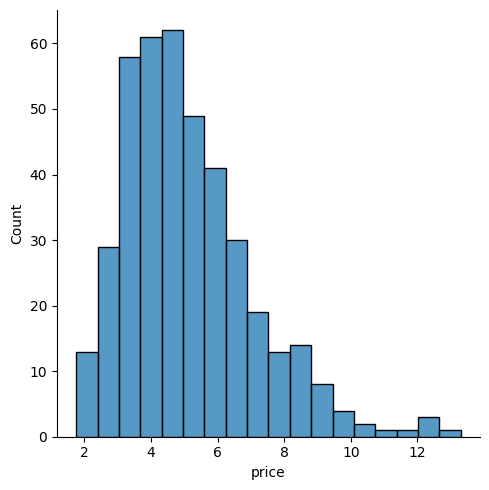

In [94]:
sns.displot(
    data=df,
    x='price'
)

In [105]:
df = pd.read_csv('datasets/housing.csv')

sq_feet_to_m2 = 0.092903

df['area_m2'] = df['area'] * sq_feet_to_m2
df.drop(columns=['area'], inplace=True)

In [106]:
df

,price,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,area_m2
0,13300000,4,2,3,yes,no,no,no,yes,2,yes,furnished,689.34026
1,12250000,4,4,4,yes,no,no,no,yes,3,no,furnished,832.41088
2,12250000,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,925.31388
3,12215000,4,2,2,yes,no,yes,no,yes,3,yes,furnished,696.77250
4,11410000,4,1,2,yes,yes,yes,no,yes,2,no,furnished,689.34026
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,2,1,1,yes,no,yes,no,no,2,no,unfurnished,278.70900
541,1767150,3,1,1,no,no,no,no,no,0,no,semi-furnished,222.96720
542,1750000,2,1,1,yes,no,no,no,no,0,no,unfurnished,336.30886
543,1750000,3,1,1,no,no,no,no,no,0,no,furnished,270.34773


In [107]:
dollar_to_rial = 600000
df['price_rial'] = df['price'] * dollar_to_rial
df.drop(columns=['price'], inplace=True)
df

df.info()

df.describe()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   bedrooms          545 non-null    int64  
 1   bathrooms         545 non-null    int64  
 2   stories           545 non-null    int64  
 3   mainroad          545 non-null    object 
 4   guestroom         545 non-null    object 
 5   basement          545 non-null    object 
 6   hotwaterheating   545 non-null    object 
 7   airconditioning   545 non-null    object 
 8   parking           545 non-null    int64  
 9   prefarea          545 non-null    object 
 10  furnishingstatus  545 non-null    object 
 11  area_m2           545 non-null    float64
 12  price_rial        545 non-null    int64  
dtypes: float64(1), int64(5), object(7)
memory usage: 55.5+ KB


,bedrooms,bathrooms,stories,parking,area_m2,price_rial
count,545.000000,545.000000,545.000000,545.000000,545.000000,5.450000e+02
mean,2.965138,1.286239,1.805505,0.693578,478.500737,2.860038e+12
std,0.738064,0.502470,0.867492,0.861586,201.612611,1.122264e+12
min,1.000000,1.000000,1.000000,0.000000,153.289950,1.050000e+12
25%,2.000000,1.000000,1.000000,0.000000,334.450800,2.058000e+12
50%,3.000000,1.000000,2.000000,0.000000,427.353800,2.604000e+12
75%,3.000000,2.000000,2.000000,1.000000,590.863080,3.444000e+12
max,6.000000,4.000000,4.000000,3.000000,1505.028600,7.980000e+12


In [108]:
df

,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,area_m2,price_rial
0,4,2,3,yes,no,no,no,yes,2,yes,furnished,689.34026,7980000000000
1,4,4,4,yes,no,no,no,yes,3,no,furnished,832.41088,7350000000000
2,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,925.31388,7350000000000
3,4,2,2,yes,no,yes,no,yes,3,yes,furnished,696.77250,7329000000000
4,4,1,2,yes,yes,yes,no,yes,2,no,furnished,689.34026,6846000000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,2,1,1,yes,no,yes,no,no,2,no,unfurnished,278.70900,1092000000000
541,3,1,1,no,no,no,no,no,0,no,semi-furnished,222.96720,1060290000000
542,2,1,1,yes,no,no,no,no,0,no,unfurnished,336.30886,1050000000000
543,3,1,1,no,no,no,no,no,0,no,furnished,270.34773,1050000000000
